In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload

%autoreload 2

In [8]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

from field_recognizer.model import load_model, load_result_mapper

In [9]:
from overall_processing.process_one_document import process_document, output_data
image_path = "test/example_forms/unihack/scan1.jpg"
with open("test/example_forms/unihack/config.json", 'r') as f:
    config = json.load(f) 

fsp = FormStructureParser(config)
model_structure_path = "model_data/model.json"
model_weights_path = "model_data/model.h5"
result_mapper_path = "model_data/emnist-balanced-mapping.txt"

# load model
model = load_model(model_structure_path, model_weights_path)

# load result mapper
result_mapper = load_result_mapper(result_mapper_path)

im = cv2.imread(image_path)

# process

# im = preprocess(im, config)
# form_data = fsp.process_form(im)
form_data = process_document(im, config, model, result_mapper)
filename = output_data(form_data, image_path)

Loaded model from disk


<IPython.core.display.Javascript object>


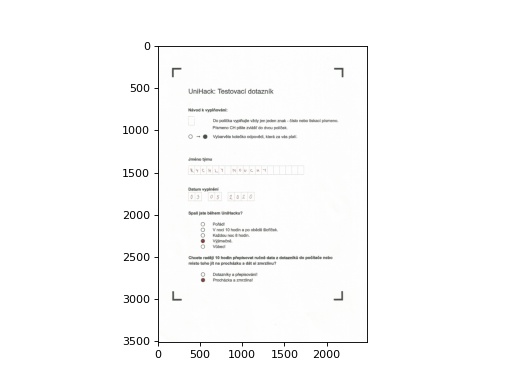

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(image_path)
imgplot = plt.imshow(im)
plt.show()

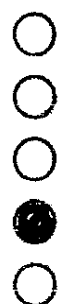

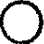

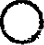

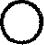

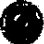

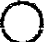

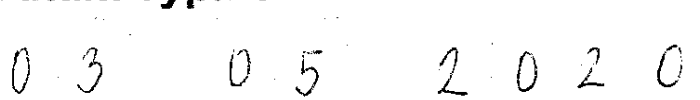

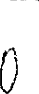

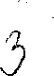

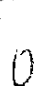

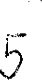

nothing


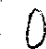

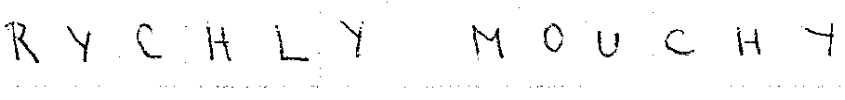

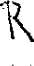

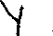

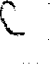

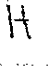

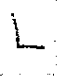

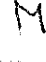

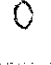

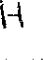

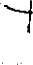

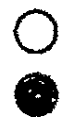

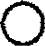

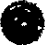

In [11]:
for field in form_data["fields"]:
    display(PIL.Image.fromarray(field["img"]))
    for img in field["box_data"]:
        if len(img)>0:
            display(PIL.Image.fromarray(img))
        else:
            print("nothing")

'False' with accuracy 0.9


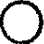

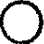

'False' with accuracy 0.9


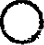

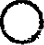

'False' with accuracy 0.9


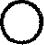

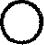

'True' with accuracy 0.9


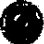

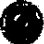

'False' with accuracy 0.9


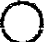

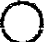

't' with accuracy 0.5


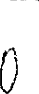

'h' with accuracy 0.5


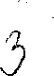

'M' with accuracy 0.5


'J' with accuracy 0.5


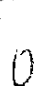

'F' with accuracy 0.5


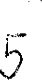

' ' with accuracy 1.0
nothing
'q' with accuracy 0.5


'Q' with accuracy 0.5


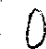

'D' with accuracy 0.5


'B' with accuracy 0.5


'P' with accuracy 0.5


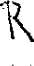

'q' with accuracy 0.5


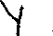

'4' with accuracy 0.5


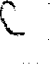

'g' with accuracy 0.5


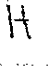

'f' with accuracy 0.5


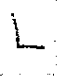

'Y' with accuracy 0.5


' ' with accuracy 1.0


'P' with accuracy 0.5


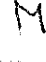

'P' with accuracy 0.5


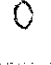

'U' with accuracy 0.5


'Q' with accuracy 0.5


'q' with accuracy 0.5


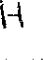

'7' with accuracy 0.5


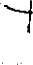

'False' with accuracy 0.9


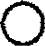

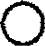

'True' with accuracy 0.9


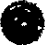

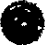

In [7]:
l=[]

for field in form_data["fields"]:
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"'{val}' with accuracy {acc}")


        if len(img)>0:
            display(PIL.Image.fromarray(img))
            display(PIL.Image.fromarray(new_img))
        else:
            print("nothing")

In [ ]:
import pickle
with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "wb") as fp:   #Pickling
    pickle.dump(l, fp)
    with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "rb") as fp:   # Unpickling
        b = pickle.load(fp)

In [ ]:
from overall_processing.process_one_document import process_document 
image_path = "test/example_forms/julinka_dotaznik/front_page.jpg"
with open("test/example_forms/julinka_dotaznik/front_page_config.json", 'r') as f:
    config = json.load(f)
im = cv2.imread(image_path)

form_data = process_document(im, config)

In [ ]:
form_data